11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7724 - loss: 0.7783 - val_accuracy: 0.9480 - val_loss: 0.1796
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9425 - loss: 0.1942 - val_accuracy: 0.9604 - val_loss: 0.1280
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9594 - loss: 0.1359 - val_accuracy: 0.9673 - val_loss: 0.1049
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9672 - loss: 0.1103 - val_accuracy: 0.9720 - val_loss: 0.0923
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9733 - loss: 0.0896 - val_accuracy: 0.9734 - val_loss: 0.0858
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9753 - loss: 0.0784 - val_accuracy: 0.9747 - val_loss: 0.0805
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9790 - loss: 0.0685 - val_accuracy: 0.9778 - val_loss: 0.0736
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9816 - loss: 0.0589 - val_accuracy: 

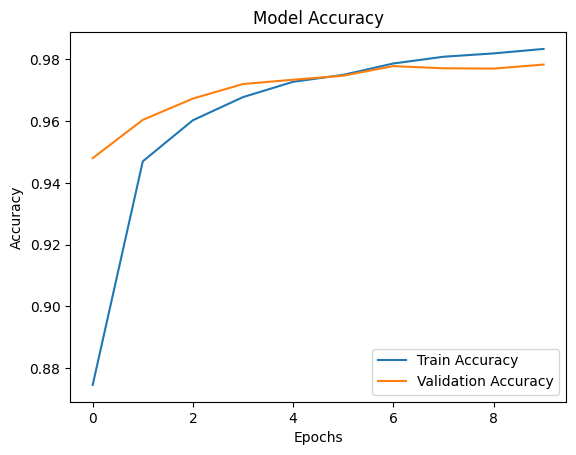

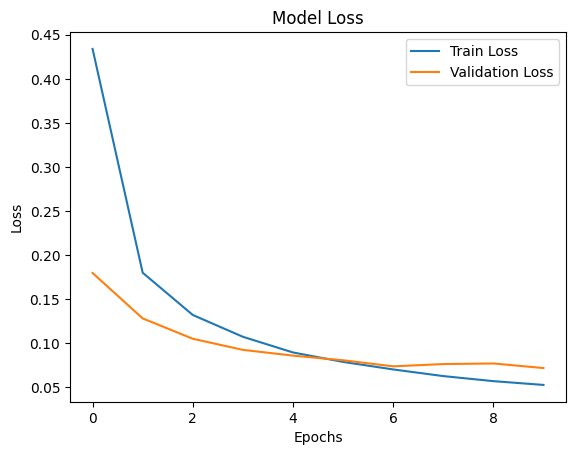

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted Label: 7
Actual Label: 7


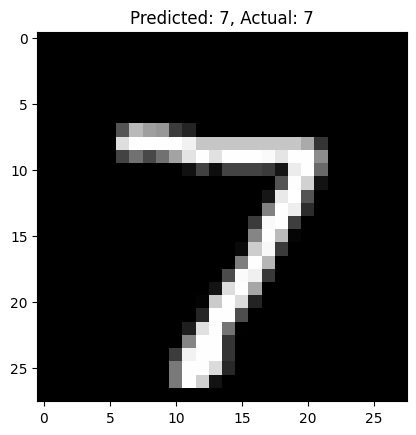

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical  # Corrected import
from sklearn.model_selection import train_test_split  # Not needed here, but retained for flexibility

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check the shape of the data
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# Flatten the images from 28x28 to 784 (28 * 28)
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

# Normalize the pixel values to be between 0 and 1
X_train /= 255
X_test /= 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the Sequential Model
model = Sequential()
# Input layer and first hidden layer (784 input features to 128 neurons)
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
# Second hidden layer (128 neurons to 64 neurons)
model.add(Dense(64, activation='relu'))
# Output layer (64 neurons to 10 output classes for digits 0-9)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=200, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict the first image in the test set
predictions = model.predict(X_test)
predicted_label = np.argmax(predictions[0])
actual_label = np.argmax(y_test[0])

print(f"Predicted Label: {predicted_label}")
print(f"Actual Label: {actual_label}")

# Display the first test image
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
plt.show()
